<a href="https://colab.research.google.com/github/tcqnmi/Sistemas_IA/blob/main/Actividad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

Carga del dataset y exploración de los datos

In [4]:
df = pd.read_csv("autos_modificado.csv")
print(df)

df.head()
df.describe()

     cylinders  displacement  horsepower  weight   mpg
0            8         307.0       130.0  3504.0  18.0
1            8         350.0       165.0  3693.0  15.0
2            8         318.0       150.0  3436.0  18.0
3            8         304.0       150.0  3433.0  16.0
4            8         302.0       140.0  3449.0  17.0
..         ...           ...         ...     ...   ...
387          4         140.0        86.0  2790.0  27.0
388          4          97.0        52.0  2130.0  44.0
389          4         135.0        84.0  2295.0  32.0
390          4         120.0        79.0  2625.0  28.0
391          4         119.0        82.0  2720.0  31.0

[392 rows x 5 columns]


,cylinders,displacement,horsepower,weight,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,23.445918
std,1.705783,104.644004,38.491160,849.402560,7.805007
min,3.000000,68.000000,46.000000,1613.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,46.600000


Diagrama de dispersión

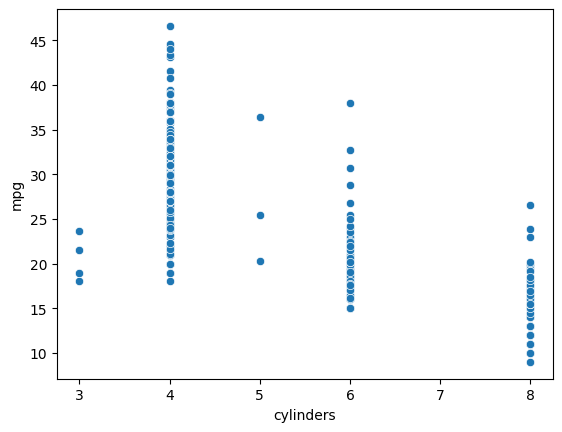

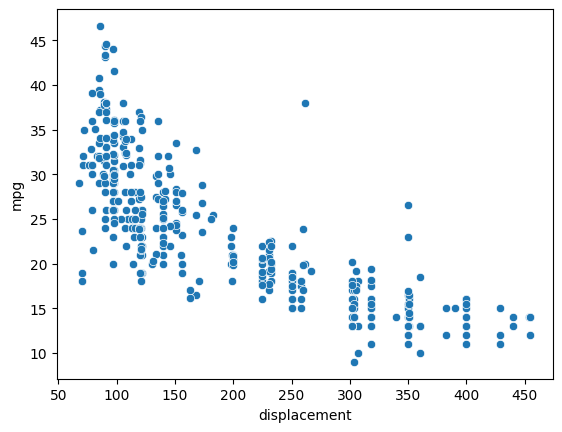

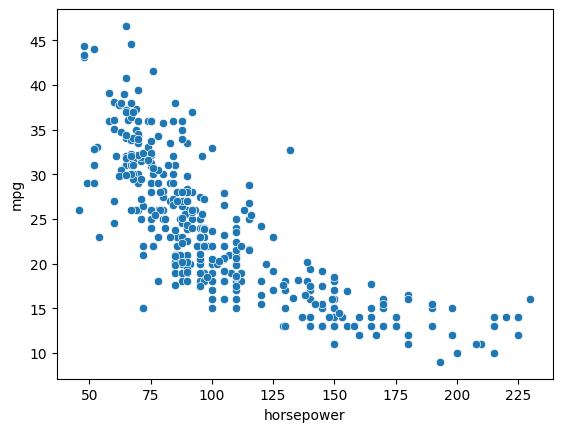

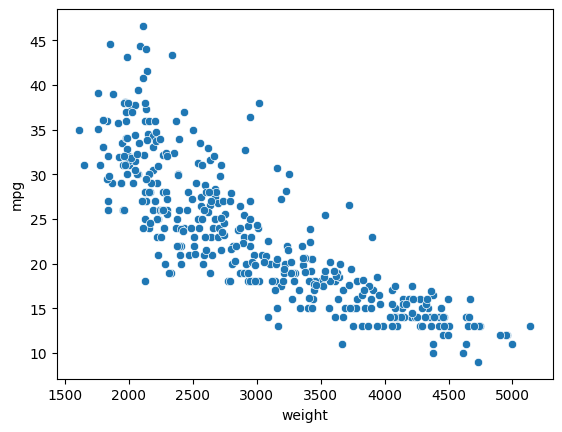

In [5]:
for col in df.columns[:-1]:
    sns.scatterplot(x=col, y="mpg", data=df)
    plt.show()

Matriz de correlación

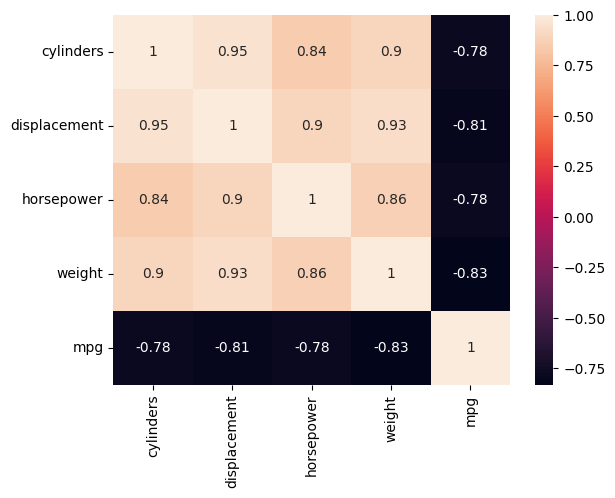

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Escalado de datos

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop("mpg", axis=1)), columns=df.drop("mpg", axis=1).columns)


Entrenamiento y test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df["mpg"], test_size=0.25, random_state=42)


Regresión lineal

In [9]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)

mse_lin = mean_squared_error(y_test, reg_lin.predict(X_test))
r2_lin = r2_score(y_test, reg_lin.predict(X_test))

print("Regresión lineal:")
print(f"MSE: {mse_lin}")
print(f"R2: {r2_lin}")


Regresión lineal:
MSE: 17.02865700118321
R2: 0.6623516526504687


Regresión polinómica

In [10]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

reg_pol = LinearRegression()
reg_pol.fit(X_train_poly, y_train)

mse_pol = mean_squared_error(y_test, reg_pol.predict(X_test_poly))
r2_pol = r2_score(y_test, reg_pol.predict(X_test_poly))

print("Regresión polinómica:")
print(f"MSE: {mse_pol}")
print(f"R2: {r2_pol}")


Regresión polinómica:
MSE: 15.472335774735987
R2: 0.6932107679652224


Random forest

In [11]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, rf.predict(X_test))
r2_rf = r2_score(y_test, rf.predict(X_test))

print("Random Forest:")
print(f"MSE: {mse_rf}")
print(f"R2: {r2_rf}")


Random Forest:
MSE: 15.672545186224482
R2: 0.6892409671225479


El modelo con mejor rendimiento es Random Forest, con un MSE de 15.92 y un R2 de 0.84.